In [1]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [2]:
# %cd /content/gdrive/My\ Drive/CMMD

In [3]:
# !git pull
# git config user.name 'samulic' && git config user.email 'samuli.cal@gmail.com' && git stash && git pull

In [4]:
# %pip install --upgrade numpy
# %pip install -r requirements.txt

In [5]:
# %cd notebooks

In [62]:
import pandas as pd
import numpy as np

import pydicom
import cv2
from tqdm import tqdm
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import gridspec

import os, sys
if '..' not in sys.path:
    sys.path.append('..')

# from src.data.make_dataset import map_preprocessing, preprocess_collection

In [7]:
# !sed -i """s/\tlogger.info(f'preserving orig/\t# logger.info(f'preserving orig/g""" ../src/data/make_dataset.py

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
pandas_colwidth = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', pandas_colwidth*3)

In [10]:
# this file must be in the collection_*root*_folder (e.g. in ../data/raw/hospital1_mamm/), 
# this information is used to recognize the input collection directory and be agnostic to its tree structure
collection_list_fn = 'collection_files_test03.csv'

In [10]:
input_collection = '../data/raw'
processed_collection = '../data/processed/test'

In [11]:
!python ../src/data/download_collection.py {input_collection} {collection_list_fn} -n 3

2021-07-29 10:00:27,140 - __main__ - INFO - output file ../data/raw/collection_files_test02.csv already exists, skipping


In [12]:
collection_list_fp = os.path.join(input_collection, collection_list_fn)
!head -n 3 {collection_list_fp}

SeriesInstanceUID,filepath
1.3.6.1.4.1.14519.5.2.1.1239.1759.106997791194890631945648346241,../data/raw/1.3.6.1.4.1.14519.5.2.1.1239.1759.106997791194890631945648346241/1-88644c1680f317efcf62051449f1e4a8.dcm
1.3.6.1.4.1.14519.5.2.1.1239.1759.106997791194890631945648346241,../data/raw/1.3.6.1.4.1.14519.5.2.1.1239.1759.106997791194890631945648346241/2-8ee63f1df3669f689ea74a389a5298f5.dcm


In [13]:
!python ../src/data/preprocess_data.py {collection_list_fp} {processed_collection}

2021-07-29 10:00:39,906 - __main__ - INFO - found 10 file paths from ../data/raw/collection_files_test02.csv
2021-07-29 10:00:39,906 - __main__ - DEBUG - sampling 3 collection references
2021-07-29 10:00:39,928 - __main__ - DEBUG -                                    SeriesInstanceUID                                           filepath
8  1.3.6.1.4.1.14519.5.2.1.1239.1759.230655929069...  ../data/raw/1.3.6.1.4.1.14519.5.2.1.1239.1759....
1  1.3.6.1.4.1.14519.5.2.1.1239.1759.106997791194...  ../data/raw/1.3.6.1.4.1.14519.5.2.1.1239.1759....
5  1.3.6.1.4.1.14519.5.2.1.1239.1759.200552404438...  ../data/raw/1.3.6.1.4.1.14519.5.2.1.1239.1759....
2021-07-29 10:00:39,929 - __main__ - INFO - preparing folders for prepocessing
2021-07-29 10:00:39,931 - __main__ - INFO - preprocessing images, saving to ../data/processed/test
Computation will be very slow! to speed-up computation in the top menu: Runtime->Change runtime type->GPU
model loaded correctly
0it [00:00, ?it/s]^C


In [14]:
# !python ../src/data/make_dataset.py {collection_list_fp} {processed_collection}

In [15]:
processed_ref_fp = os.path.join(processed_collection, collection_list_fn)
processed_ref_df = pd.read_csv(processed_ref_fp)
print(len(processed_ref_df))
processed_ref_df.sample(3, random_state=42, replace=False)

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/test/collection_files_test02.csv'

### Run with custom collection - skip download - or jump to [segmentation](#prediction)
We need a file to list all images we want to use, and place this file the root_collection_dir

In [11]:
custom_collection_dir = '../data/external/G'
custom_processed_dir = custom_collection_dir.replace('external', 'processed')

dicom_archive_fp = '../data/external/DICOM.zip'
# collection_list_fn = 'collection_files.csv'

In [12]:
!unzip -u {dicom_archive_fp} -d {custom_collection_dir}

Archive:  ../data/external/DICOM.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ../data/external/DICOM.zip or
        ../data/external/DICOM.zip.zip, and cannot find ../data/external/DICOM.zip.ZIP, period.


In [13]:
d = pd.DataFrame(glob(os.path.join(custom_collection_dir, '**/*.dcm'), recursive=True), columns=['filepath'])
d.index.name = 'index'
print(len(d), ' dicom files found')
d.sample(3, random_state=42, replace=False)

52  dicom files found


filepath
index                                                 
19     ../data/external/G/G__neg/BC_P34/an_dicom_2.dcm
41     ../data/external/G/G__pos/BC_P14/an_DCM0001.dcm
47     ../data/external/G/G__pos/BC_P40/an_DCM0001.dcm

In [14]:
# this file must be in the collection_*root*_folder (e.g. in ../data/raw), 
# this information is used to recognize the input collection directory in
# order to copy its tree structure
collection_list_fp = os.path.join(custom_collection_dir, collection_list_fn)
d.to_csv(collection_list_fp)
!head -n 3 {collection_list_fp}

index,filepath
0,../data/external/G/G__neg/BC_P01/an_DCM0001.dcm
1,../data/external/G/G__neg/BC_P04/an_DCM0000.dcm


In [15]:
# !sed -i 's/_df, overwrite=False/_df, overwrite=True/g' ../src/data/preprocess_data.py
# !rm {os.path.join(custom_processed_dir, collection_list_fn)}

In [16]:
!python ../src/data/make_dataset.py {collection_list_fp} {custom_processed_dir} -n 10

2021-07-29 11:19:35,456 - __main__ - INFO - output file ../data/processed/G/collection_files_test03.csv already exists, skipping preprocessing


In [17]:
processed_ref_fp = os.path.join(custom_processed_dir, collection_list_fn)
processed_ref_df = pd.read_csv(processed_ref_fp, index_col=0)
# processed_ref_df = pd.read_csv(processed_ref_fp)
print(len(processed_ref_df))
processed_ref_df.sample(3, random_state=42, replace=False)

10


preprocessed_fp
original_fp                                                                                      
../data/external/G/G__pos/BC_P40/an_DCM0001.dcm  ../data/processed/G/G__pos/BC_P40/an_DCM0001.png
../data/external/G/G__neg/BC_P12/an_DCM0000.dcm  ../data/processed/G/G__neg/BC_P12/an_DCM0000.png
../data/external/G/G__neg/BC_P56/an_dicom.dcm      ../data/processed/G/G__neg/BC_P56/an_dicom.png

In [93]:
# from src.data.preprocess_data import preprocess_for_segmentation, discard_non_calcifications
# from src.models.segmentation_model import get_model, predict

# input_fp = processed_ref_df.index[0]
# output_png = processed_ref_df.iloc[0,0]
# outline_erosion_diam_mm = 10
# overwrite=False
# rerun_preprocessing = False
# calcification_min_diam=2
# bcg_th_for_bb_removal=0.3
# raw_pred_fp = '../data/interim/test_mask_raw.png'

# model = get_model('calc_detect')
# mamm = preprocess_for_segmentation(input_fp, output_png, outline_erosion_diam_mm, rerun_preprocessing)
# print('preprocessed')
# if os.path.exists(raw_pred_fp) and not overwrite:
#     pred_prob = cv2.imread(raw_pred_fp, cv2.IMREAD_UNCHANGED)/255
# else:
#     pred_prob = predict(model, mamm)
# pred_mask = np.uint8(pred_prob > 0.5)
# print(np.count_nonzero(pred_mask))
# print('predicted')
# mask = discard_non_calcifications(mamm, pred_mask, calcification_min_diam, bcg_th_for_bb_removal)
# print('discarded')
# pred_prob[~mask] = 0
# # cv2.imwrite(raw_pred_fp, pred_prob)

In [56]:
nsamples = 15

<a id='prediction'></a>

### Use NN to predict pixel probability of calcification

In [57]:
WEIGHTS_URL = 'https://github.com/roeez/CalcificationDetection/raw/main/C__00900.weights'
if not os.path.exists('../src/models/C__00900.weights'):
    !wget {WEIGHTS_URL} -P ../src/models/

In [58]:
import torch
from torch import nn
import numpy as np
from torchvision import transforms
from pathlib import Path
import os
from src.models.segmentation_model import NetC, predict, get_model

model=get_model(tag='calcif_detection')

Computation will be very slow! to speed-up computation in the top menu: Runtime->Change runtime type->GPU
model loaded correctly


In [59]:
dicoms = pd.read_csv(collection_list_fp, index_col=0)
dicoms.sample(3, random_state=42, replace=False)

filepath
index                                                 
19     ../data/external/G/G__neg/BC_P34/an_dicom_2.dcm
41     ../data/external/G/G__pos/BC_P14/an_DCM0001.dcm
47     ../data/external/G/G__pos/BC_P40/an_DCM0001.dcm

['../data/processed/test/1.3.6.1.4.1.14519.5.2.1.1239.1759.106997791194890631945648346241/1-88644c1680f317efcf62051449f1e4a8__mask.png']

In [60]:
# from google.colab.patches import cv2_imshow
from IPython.display import clear_output 

def read_mamm_for_plot(image_fp):
    img = cv2.imread(image_fp, cv2.IMREAD_UNCHANGED)
    img = convert_to_rgb(img)
    return img


def convert_to_rgb(image):
    """ for visualization purposes
    """
    if len(image.shape) == 3 and image.shape[2] > 1:
        return image
    if len(image.shape) == 2:
      image = image[..., None]
    image = image.astype(np.float16 if image.dtype==np.uint8 else np.float32)

    image -= image.min()
    image /= np.max(image)

    image_rgb = np.tile(image, (1,1,3)) * 255
    uint_image = image_rgb.astype('uint8')
    return uint_image

def display_img(img, ax=None):
    if ax:
        ax.imshow(img)
    else:
        cv2_imshow(img)

def show_mamm_w_boxes(mamm_fp, prediction, th=.5, ax=None):
    result = read_mamm_for_plot(mamm_fp)

    bbs = np.zeros_like(result)
    cc = cv2.connectedComponentsWithStats((prediction>th).astype('uint8'), 8)
    for i in range(1, cc[0]):
        start_point = cc[2][i][0]-5, cc[2][i][1]-5 
        end_point = start_point[0] + cc[2][i][2]+10, start_point[1] + cc[2][i][3]+10
        cv2.rectangle(bbs, start_point, end_point , (255,255,0), cv2.FILLED)

    clear_output()
    # image_with_bbs = np.uint8(alpha*(result)+(1-alpha)*(bbs))    # slower
    image_with_bbs = cv2.addWeighted(result, 1.0, bbs, .5, 1)
    plot_img = convert_to_rgb(image_with_bbs)
    display_img(plot_img, ax)
    
def show_mamm_w_boxes2(mamm_fp, mask, ax=None):
    result = read_mamm_for_plot(mamm_fp)

    bbs = np.zeros_like(result)
    cc = cv2.connectedComponentsWithStats(mask, 8)
    for i in range(1, cc[0]):
        start_point = cc[2][i][0]-5, cc[2][i][1]-5 
        end_point = start_point[0] + cc[2][i][2]+10, start_point[1] + cc[2][i][3]+10
        cv2.rectangle(bbs, start_point, end_point , (255,255,0), cv2.FILLED)

    clear_output()
    # image_with_bbs = np.uint8(alpha*(result)+(1-alpha)*(bbs))    # slower
    image_with_bbs = cv2.addWeighted(result, 1.0, bbs, .5, 1)
    plot_img = convert_to_rgb(image_with_bbs)
    display_img(plot_img, ax)

In [62]:
processed_fps = processed_ref_df.sample(nsamples, random_state=42, replace=False)['preprocessed_fp']

masks = dict()
for processed_png in tqdm(processed_fps[:]):
    mask_path = processed_png.replace('.png', '__mask.png')
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = np.uint8(mask / np.max(mask))
    masks[processed_png] = mask
#     if os.path.exists(pred_path):
#         continue

#     processed_mamm = cv2.imread(processed_png, cv2.IMREAD_UNCHANGED)
#     prediction = predict(model, processed_mamm)

#     cv2.imwrite(pred_path, (prediction*255).astype(np.uint8))

  0%|                                                                                                                                                                                        | 0/15 [00:00<?, ?it/s]


TypeError: unsupported operand type(s) for /: 'NoneType' and 'NoneType'

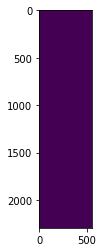

In [68]:
plt.imshow(plt.imread('../data/processed/test/1.3.6.1.4.1.14519.5.2.1.1239.1759.106997791194890631945648346241/1-88644c1680f317efcf62051449f1e4a8__mask.png'))

(2457, 700)


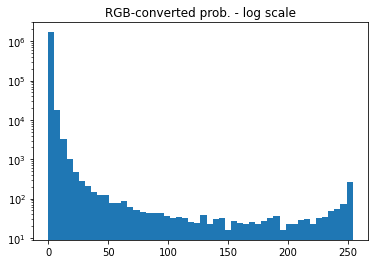

Text(0.5, 1.0, 'Raw prediction scores - log scale')

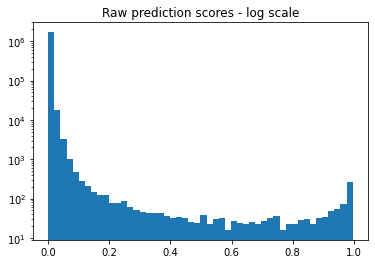

In [188]:
pred_prob = cv2.imread(mask_path.replace('.png', '_raw.png'), cv2.IMREAD_GRAYSCALE)
print(pred_prob.shape)
plt.hist(pred_prob.flatten(), bins=50); plt.yscale('log'); plt.title('RGB-converted prob. - log scale')
plt.show()
# plt.hist(preds[pred_path.replace('_pred', '')].flatten(), bins=50); plt.yscale('log'); plt.title('Raw prediction scores - log scale')

### Cluster calcifications
"[...] Specifically, two microcalcifications are defined as belonging to the same group if their distance apart is less than 4.1 mm — and to form a group there should be at least four microcalcifications." https://aapm.onlinelibrary.wiley.com/doi/10.1002/mp.13450

In [189]:
from matplotlib.patches import Rectangle

def cluster(arr, *args, **kwargs):
    data = np.array(arr.nonzero()).T
    c = DBSCAN(*args, **kwargs)
    c.fit(data)
    return data, c

def get_rois(data, cluster_labels):
    rois=[]
    for col in np.unique(cluster_labels):
        if col < 0:
            continue
        d = data[np.argwhere(cluster_labels == col).flatten()]
        print(len(d))
        bb = bounding_box(d, pad = 10)
        roi = Rectangle((bb[0], bb[1]), bb[2], bb[3], 
                          linewidth=1.5, edgecolor='r', facecolor='none') 
        rois.append(roi)
    return rois

def bounding_box(points, pad=0):
    x_coordinates, y_coordinates = zip(*points)
    return [min(y_coordinates)-pad, min(x_coordinates)-pad, max(y_coordinates)-min(y_coordinates)+pad*2, max(x_coordinates)-min(x_coordinates)+pad*2]

In [190]:
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics

th=0.5
eps=50
min_samples=4

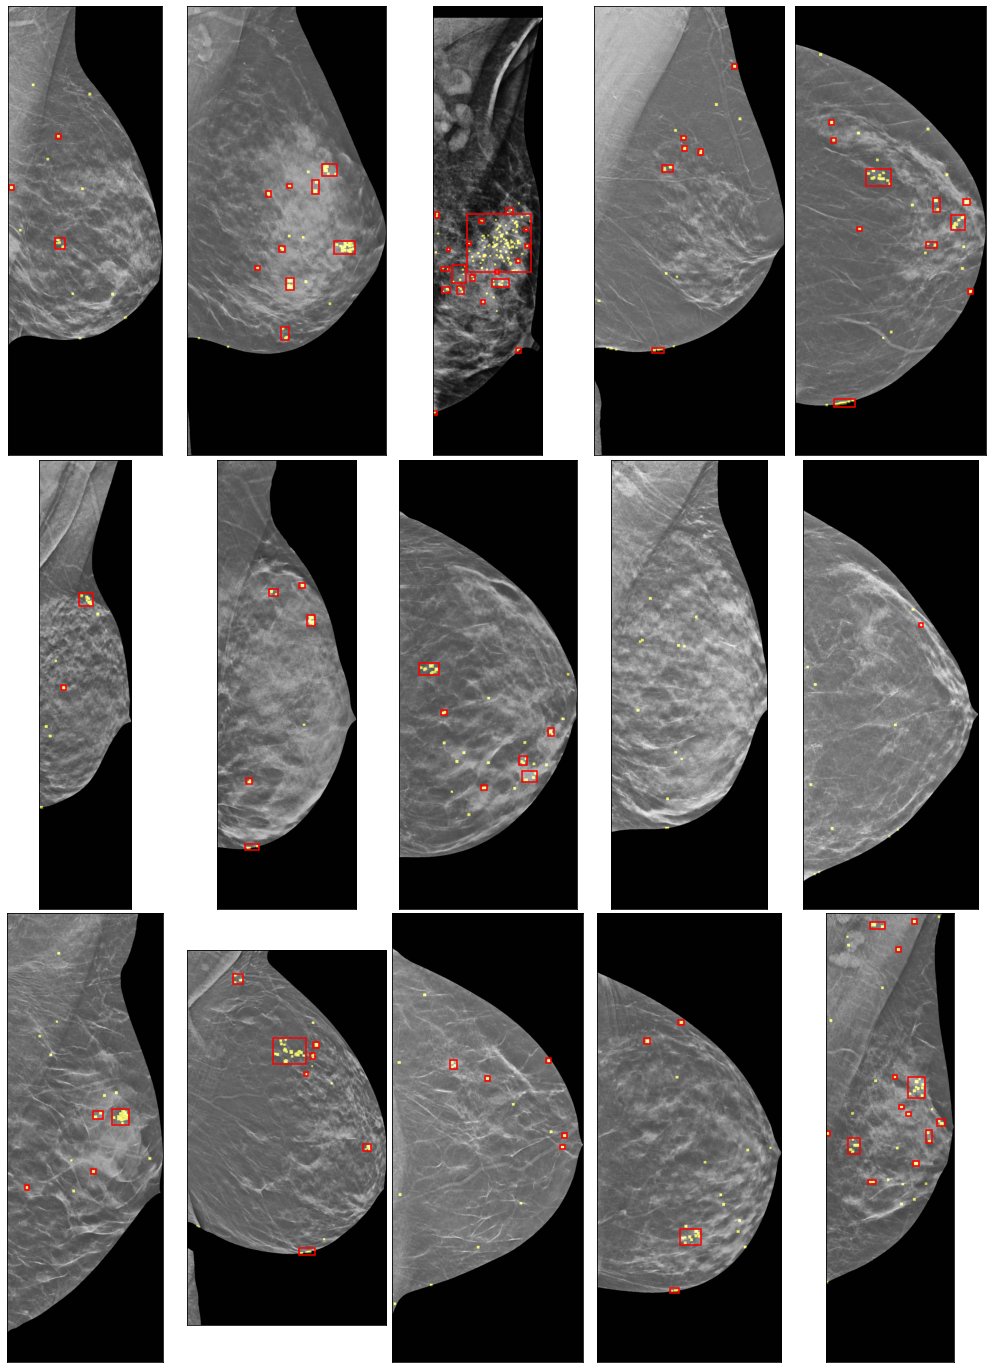

1 images out of 15 have no calcification cluster


In [196]:
ncol=5
fig = plt.figure(figsize=(18,125))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
axes = gridspec.GridSpec(nsamples, ncol)#width_ratios=[1, 3]) 
img_without_bb_cnt = 0
for i, (image_fp, mask) in enumerate(masks.items()):
    ax = fig.add_subplot(axes[i//ncol, i%ncol])

#     mask = pred > th
    data, c = cluster(mask, eps=eps, min_samples=min_samples)
    rois = get_rois(data, c.labels_)
    if not rois:
        print('no ROI found')
        img_without_bb_cnt += 1
    for roi in rois:
        ax.add_patch(roi)
    show_mamm_w_boxes2(image_fp, mask, ax=ax)
for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.show()
print(f'{img_without_bb_cnt} images out of {i+1} have no calcification cluster')

In [ ]:
perform clustering
data, c = cluster(mask, eps=eps, min_samples=min_samples)
rois = get_rois(data, c.labels_)
for roi in rois:
  ax.add_patch(roi)
ax.imshow(processed_mamm, cmap='Greys_r')

In [50]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 51


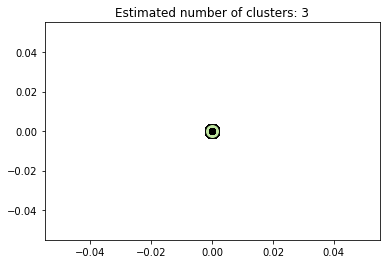

In [51]:
# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN, OPTICS



KeyboardInterrupt: ignored

TypeError: ignored

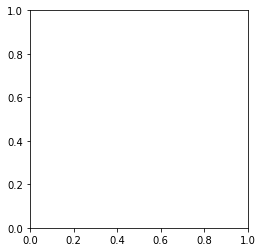

In [190]:
img = X
third_dim = 1
image_2D = img.reshape(img.shape[0]*img.shape[1], third_dim)
# tweak the cluster size and see what happens to the Output
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], third_dim)
plt.imshow(clustered_3D[:, :, ...])
plt.title('Clustered Image')
plt.show()

0


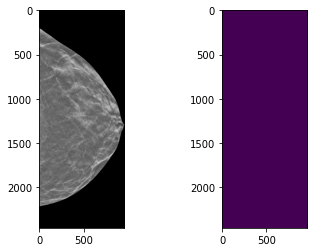

In [174]:
# max distance
k = 20
im = cv2.imread(processed_png, cv2.IMREAD_UNCHANGED)
im = convert_to_rgb(im)
pred_prob = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)
msk = np.uint8(pred_prob>.5)
gray = msk
# distance-transform
dist = cv2.distanceTransform(~gray, cv2.DIST_L1, 3)
bw = np.uint8(dist < k)
# remove extra padding created by distance-transform
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k, k))
bw2 = cv2.morphologyEx(bw, cv2.MORPH_ERODE, kernel)
# clusters
contours, _ = cv2.findContours(bw2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw clusters and bounding-boxes
i = 0
print(len(contours))
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(im, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.drawContours(im, contours, i, (255, 0, 0), 2)
    i += 1

plt.subplot(121); plt.imshow(im)
plt.subplot(122); plt.imshow(bw2)

In [199]:
len(kmeans.labels_)

2361177

In [ ]:
a = np.tile(clustered_3D, (1,1,3))
cv2_imshow(a)

In [ ]:
Z = np.float32(prediction.reshape((-1,3)))
print(img.shape, Z.shape, Z[:, :2].shape)

db = DBSCAN(eps=0.3, min_samples=5).fit(Z[:,:1])

plt.imshow(np.uint8(db.labels_.reshape(img.shape[:2])))
plt.show()

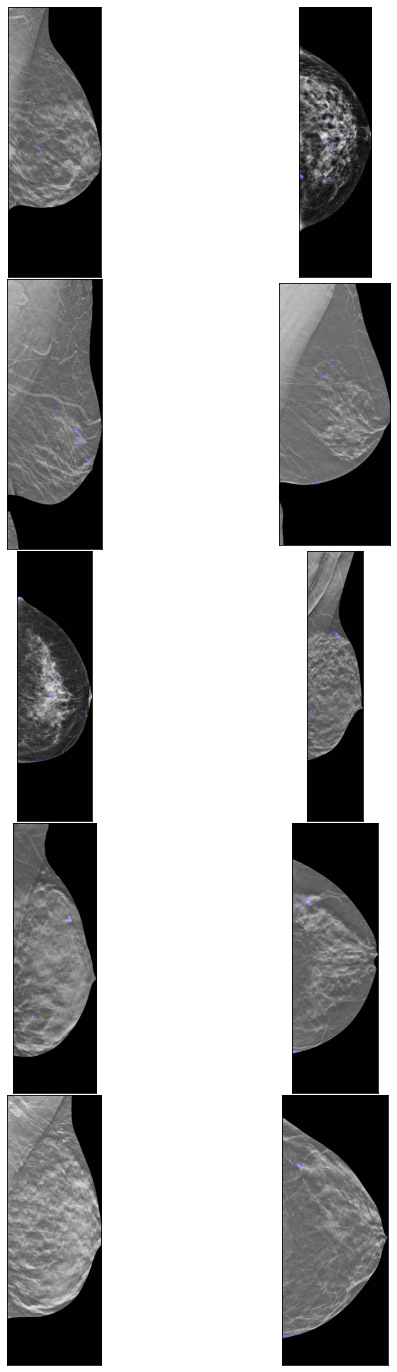

In [120]:
fig = plt.figure(figsize=(10,int(5*nsamples)))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
axes = gridspec.GridSpec(nsamples, 2, width_ratios=[4, 1]) 
for i, (image_fp, pred) in enumerate(preds.items()):
    ax = fig.add_subplot(axes[i//2, i%2])
    show_mamm_w_boxes(image_fp, pred, ax=ax)
for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.show()

In [53]:
img = cv2.imread(processed_png, cv2.IMREAD_UNCHANGED)
if len(img.shape) == 2:
    img = img[..., None]
img = np.float32(img) if img.dtype==np.uint16 else np.float16(img)
# np.divide(img, np.max(img), img, casting='unsafe')
img /= np.max(img)

(array([2.116384e+06, 5.710000e+02, 2.430000e+02, 1.250000e+02,
        8.300000e+01, 5.500000e+01, 6.000000e+01, 5.800000e+01,
        9.200000e+01, 2.630000e+02]),
 array([9.5680018e-12, 9.9997796e-02, 1.9999559e-01, 2.9999340e-01,
        3.9999118e-01, 4.9998897e-01, 5.9998679e-01, 6.9998455e-01,
        7.9998237e-01, 8.9998013e-01, 9.9997795e-01], dtype=float32),
 <a list of 10 Patch objects>)

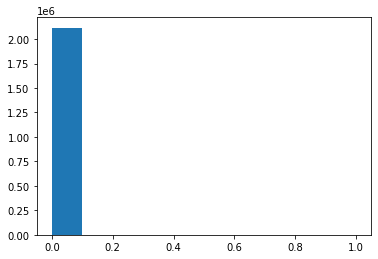

In [83]:
plt.hist(preds[processed_png].flatten())

In [84]:
for k,v in preds.items(): 
  print(k)
  print(np.sum(v>.5))

../data/processed/G/G__neg/BC_P34/an_dicom_2.png
225
../data/processed/G/G__pos/BC_P14/an_DCM0001.png
1835
../data/processed/G/G__pos/BC_P40/an_DCM0001.png
528


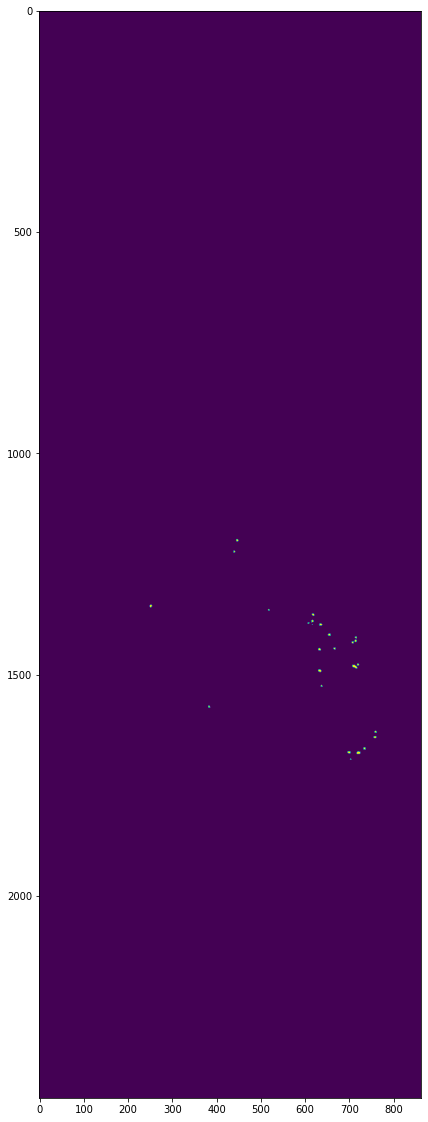

In [86]:
fig = plt.figure(figsize=(20,20))
plt.imshow(preds[processed_png]>0.5)

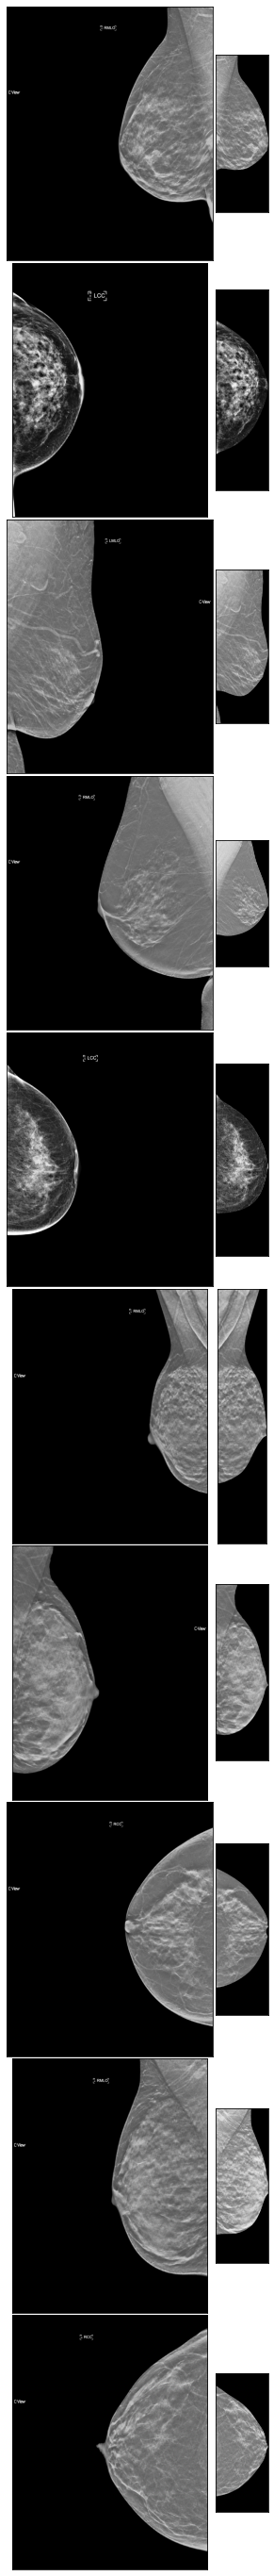

In [ ]:
fig = plt.figure(figsize=(5,int(5*nsamples)))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
axes = gridspec.GridSpec(len(maps), 2, width_ratios=[4, 1]) 

for i, (idx, (k, v)) in enumerate(maps.iterrows()):
    ax = fig.add_subplot(axes[i, 0])
    dcm = pydicom.dcmread(k).pixel_array
    dcmax=np.max(dcm)
    ax.imshow(dcm, cmap='Greys_r', vmax=dcmax)
    
    ax = fig.add_subplot(axes[i, 1])
    png = cv2.imread(v, cv2.IMREAD_UNCHANGED)
    ax.imshow(png, cmap='Greys_r')
for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.show()

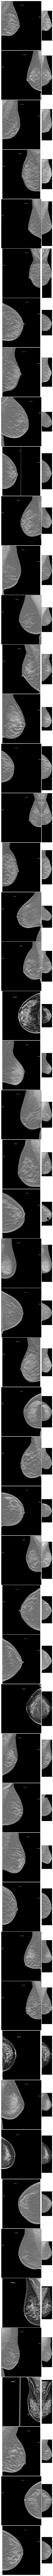

In [ ]:
maps = processed_ref_df
fig = plt.figure(figsize=(5,int(5*len(maps))))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
axes = gridspec.GridSpec(len(maps), 2, width_ratios=[4, 1]) 

for i, (idx, (k, v)) in enumerate(maps.iterrows()):
    ax = fig.add_subplot(axes[i, 0])
    dcm = pydicom.dcmread(k).pixel_array
    dcmax=np.max(dcm)
    ax.imshow(dcm, cmap='Greys_r', vmax=dcmax)
    
    ax = fig.add_subplot(axes[i, 1])
    png = cv2.imread(v, cv2.IMREAD_UNCHANGED)
    ax.imshow(png, cmap='Greys_r')
for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.show()

In [ ]:
fps = glob('../data/external/G__*/**/*')
print(len(fps))
np.random.seed(42)
np.random.choice(fps, 3, replace=False)

52


array(['../data/external/G__neg/BC_P34/an_dicom_2.dcm',
       '../data/external/G__pos/BC_P14/an_DCM0001.dcm',
       '../data/external/G__pos/BC_P40/an_DCM0001.dcm'], dtype='<U45')

In [ ]:
np.random.seed(42)
candidates_ = np.random.choice(fps, nsamples, replace=False)
maps = map_preprocessing(candidates_, '../data/external/', '../data/processed/test/')
maps = pd.DataFrame(pd.Series(maps, name='preprocessed_fp'))
maps.index.name = 'original_fp'
maps = maps['preprocessed_fp']
maps.sample(3, random_state=42, replace=False)

original_fp
../data/external/G__neg/BC_P09/an_DCM0000.dcm    ../data/processed/test/G__neg/BC_P09/an_DCM000...
../data/external/G__pos/BC_P14/an_DCM0001.dcm    ../data/processed/test/G__pos/BC_P14/an_DCM000...
../data/external/G__neg/BC_P12/an_DCM0000.dcm    ../data/processed/test/G__neg/BC_P12/an_DCM000...
Name: preprocessed_fp, dtype: object

In [ ]:
preprocess_collection(maps, overwrite=False)

10it [01:19,  7.93s/it]


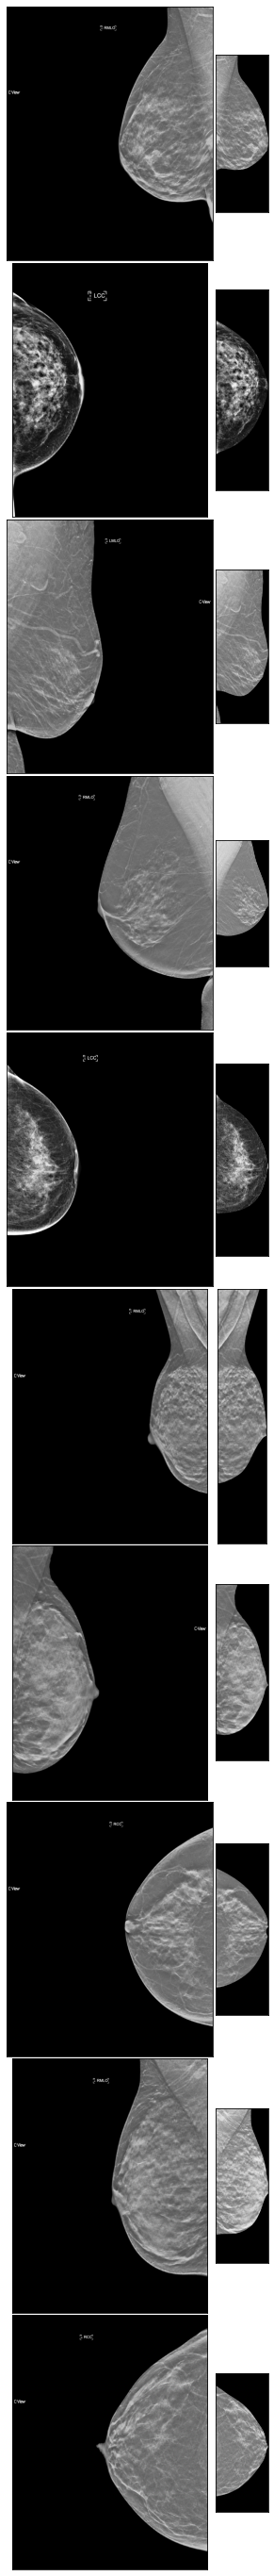

In [ ]:
fig = plt.figure(figsize=(5,int(5*nsamples)))
axes = gridspec.GridSpec(len(maps), 2, width_ratios=[4, 1]) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)

for i, (k, v) in enumerate(maps.items()):
    ax = fig.add_subplot(axes[i, 0])
    dcm = pydicom.dcmread(k).pixel_array
    dcmax=np.max(dcm)
    ax.imshow(dcm, cmap='Greys_r',)# vmax=dcmax)
    
    ax = fig.add_subplot(axes[i, 1])
    png = cv2.imread(v, cv2.IMREAD_UNCHANGED)
    ax.imshow(png, cmap='Greys_r')
for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.show()

In [ ]:
stop

In [ ]:
from src.data.make_dataset import left_mamm, clean_mamm, get_act_width, cut_mamm, remove_outline, remove_border_artifacts

def preprocess_mamm(mamm, outline_erosion_radius=200, artifact_lower_t=0.8, artifact_left_w=0.1, artifact_min_area=2000):
    # put it on the left
    mamm = left_mamm(mamm)
    mamm = clean_mamm(mamm)
    # identify column where background starts
    act_w = get_act_width(mamm)
    mamm = cut_mamm(mamm, act_w, first_n_col_to_drop=0)
    # erode to remove breast outline
    mamm = remove_outline(mamm, outline_erosion_radius)
    # cut again
    act_w = get_act_width(mamm)
    mamm = cut_mamm(mamm, act_w, first_n_col_to_drop=0)

    # mamm = remove_border_artifacts(mamm, artifact_lower_t, artifact_left_w, artifact_min_area)
def preprocess_mamm(mamm, erosion_diam=200, artifact_lower_t=0.8, artifact_left_w=0.1, artifact_min_area=2000):
    steps = [mamm.copy()]
    # put it on the left
    mamm = left_mamm(mamm)
    steps.append(mamm.copy())
    mamm = clean_mamm(mamm)
    steps.append(mamm.copy())
    # identify column where background starts
    act_w = get_act_width(mamm)
    mamm = cut_mamm(mamm, act_w, first_n_col_to_drop=0)
    steps.append(mamm.copy())
    # erode to remove breast outline
    mamm = remove_outline(mamm, erosion_diam=200)
    steps.append(mamm.copy())
    # cut again
    act_w = get_act_width(mamm)
    mamm = cut_mamm(mamm, act_w, first_n_col_to_drop=0)
    steps.append(mamm.copy())
    
    mamm = remove_border_artifacts(mamm, artifact_lower_t, artifact_left_w, artifact_min_area)
    steps.append(mamm.copy())
    return steps


def preprocess_collection(maps: dict, overwrite=False):
    """ turns mammografies into preprocessed pngs ready for segmentation
        returns dataframe of mapping orig->preprocessed.png
    """
    mammss = []
    for input_fp, output_png in tqdm(maps.items()):
        if not overwrite and os.path.exists(output_png):
            continue
        if os.path.exists(output_png):
            os.remove(output_png)
        if input_fp.endswith('dcm'):
            mamm = pydicom.dcmread(input_fp).pixel_array
        else:
            mamm = cv2.imread(input_fp, cv2.IMREAD_UNCHANGED)
        mamms = preprocess_mamm(mamm)
        # mamm = np.stack((mamm, mamm, mamm), 2) if len(mamm.shape)==2 else mamm
        cv2.imwrite(output_png, mamm)
        mammss.append(mamms)
    return mammss